In [207]:
from pyspark import SparkContext                                    # Importing SparkContext
from pyspark.sql import SparkSession, Window, Row                   # Importing importing methods for creating a cluster
from pyspark.sql import functions as F                              # Importing SQL Functions
from pyspark.sql.functions import col, isnan, when, count           # Importing relevant dataframe functions
from pyspark.sql.functions import *                                 # Importing inbuilt SQL Functions
from pyspark.sql.types import *                                     # Importing SQL types
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Popular plotting library
%matplotlib inline                                                  # To plot graphs inline the notebook
import seaborn as sns                                               # Advanced plotting library
from handyspark import *                                            # Helper library to plot graphs
#-------------------------------------------------------------------------------------------------------------------------------
from pyspark.ml.feature import VectorAssembler                      # For processing dataset for ML
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

UsageError: unrecognized arguments: # To plot graphs inline the notebook


In [208]:
# Building a spark app/session
spark = SparkSession.builder.appName("carsSpark").getOrCreate()

# single cluster information
spark

In [209]:
# Reading the data
df = spark.read.csv('car data.csv', header=True, inferSchema="true")

# Shape of the dataset
print('Shape of the dataset: ', (df.count(), len(df.columns)))

# Displaying top n=10 rows
df.show()

Shape of the dataset:  (301, 9)
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         6.75|         8.12|     18796|

In [210]:
# Getting a description of the dataset
df.describe().show()

+-------+--------+------------------+-----------------+-----------------+-----------------+---------+-----------+------------+-------------------+
|summary|Car_Name|              Year|    Selling_Price|    Present_Price|       Kms_Driven|Fuel_Type|Seller_Type|Transmission|              Owner|
+-------+--------+------------------+-----------------+-----------------+-----------------+---------+-----------+------------+-------------------+
|  count|     301|               301|              301|              301|              301|      301|        301|         301|                301|
|   mean|   800.0|2013.6279069767443|4.661295681063127|7.628471760797344|36947.20598006644|     null|       null|        null|0.04318936877076412|
| stddev|    null|2.8915541273367253|5.082811556177805|8.644115402015789|38886.88388206789|     null|       null|        null| 0.2479148926949198|
|    min|     800|              2003|              0.1|             0.32|              500|      CNG|     Dealer|   Au

In [211]:
# Checking for dataframe schema
df.printSchema()  

root
 |-- Car_Name: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Selling_Price: double (nullable = true)
 |-- Present_Price: double (nullable = true)
 |-- Kms_Driven: integer (nullable = true)
 |-- Fuel_Type: string (nullable = true)
 |-- Seller_Type: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Owner: integer (nullable = true)



In [212]:
# Selecting multiple columns
df.select(['Selling_Price','Present_Price']).show()

+-------------+-------------+
|Selling_Price|Present_Price|
+-------------+-------------+
|         3.35|         5.59|
|         4.75|         9.54|
|         7.25|         9.85|
|         2.85|         4.15|
|          4.6|         6.87|
|         9.25|         9.83|
|         6.75|         8.12|
|          6.5|         8.61|
|         8.75|         8.89|
|         7.45|         8.92|
|         2.85|          3.6|
|         6.85|        10.38|
|          7.5|         9.94|
|          6.1|         7.71|
|         2.25|         7.21|
|         7.75|        10.79|
|         7.25|        10.79|
|         7.75|        10.79|
|         3.25|         5.09|
|         2.65|         7.98|
+-------------+-------------+
only showing top 20 rows



In [213]:
df.dtypes


[('Car_Name', 'string'),
 ('Year', 'int'),
 ('Selling_Price', 'double'),
 ('Present_Price', 'double'),
 ('Kms_Driven', 'int'),
 ('Fuel_Type', 'string'),
 ('Seller_Type', 'string'),
 ('Transmission', 'string'),
 ('Owner', 'int')]

# EDA

In [214]:
# Creating a dataframe to check null value counts
null_df = df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '') | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])

# Displaying the null value counts dataframe
null_df.show()

+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|       0|   0|            0|            0|         0|        0|          0|           0|    0|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+



In [215]:
# Converting Year to datetime
df1 = df.withColumn("Year", F.to_date(F.col("Year").cast("string"), 'yyyy'))

# Extracting Year
df = df1.withColumn('Year', F.year(F.to_timestamp('Year', 'yyyy')))
df.show()

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         6.75|         8.12|     18796|   Petrol|     Dealer|      Manu

In [216]:
from handyspark import * 

In [217]:
hdff=df.toHandy()
hdff.show()

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         6.75|         8.12|     18796|   Petrol|     Dealer|      Manu

In [218]:
# Converting to Pandas dataframe for visualization
hdf =df.toPandas()


In [219]:
hdf.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


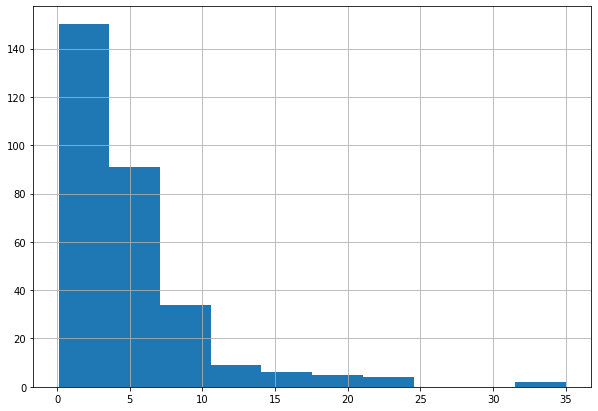

In [220]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf['Selling_Price'].hist(ax=ax)
plt.show()

### Observation:

We see a right skewed distribution.

Max price can go till 35 lacs causing the skew.

Majority of the cars have price listings under 15 lacs.

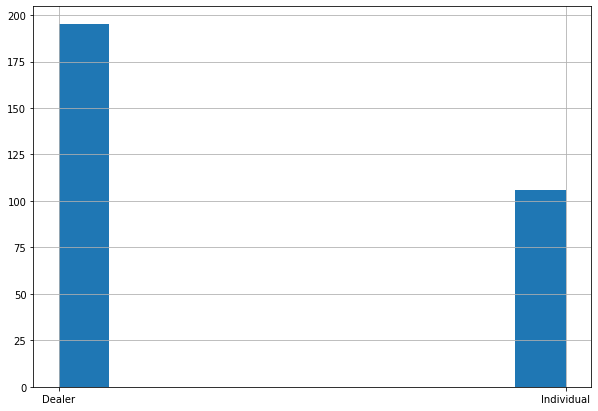

In [221]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf['Seller_Type'].hist(ax=ax)
plt.show()

### Observation:

More than 175 sellers are dealers and the rest are simply individuals looking for selling their cars.

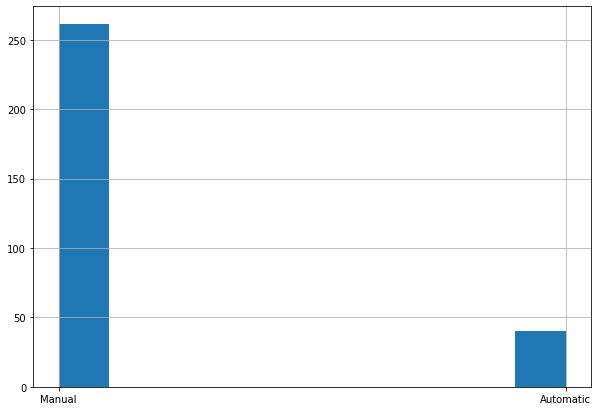

In [222]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf['Transmission'].hist(ax=ax)
plt.show()

### Observation:

Mostof the listed cars (> 250) are of Manual transmission type.

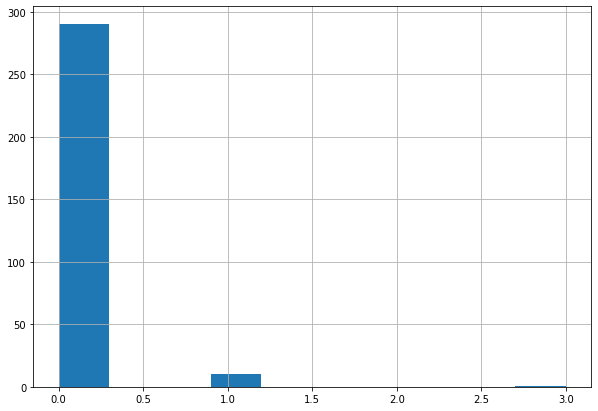

In [223]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf['Owner'].hist(ax=ax)
plt.show()

### Observation:

We have three owner types where 0 indicates brand new cars (0 previous owners), 1 indicates that the car is second-hand, and 3 indicates that there were 3 owners before the car was listed.

There is just one row which has Owner=3.

In [224]:
import seaborn as sns 

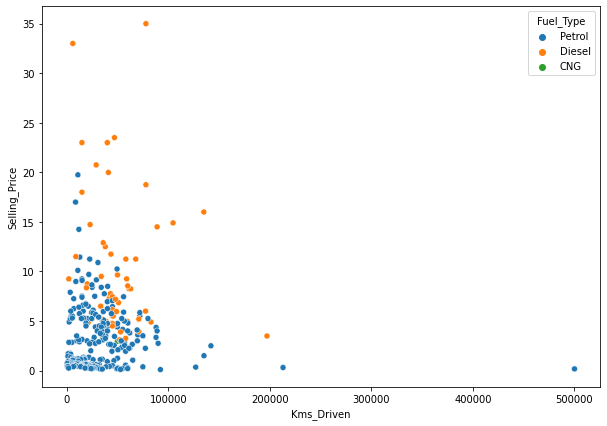

In [284]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=hdf, x="Kms_Driven", y="Selling_Price",hue="Fuel_Type")
plt.show()

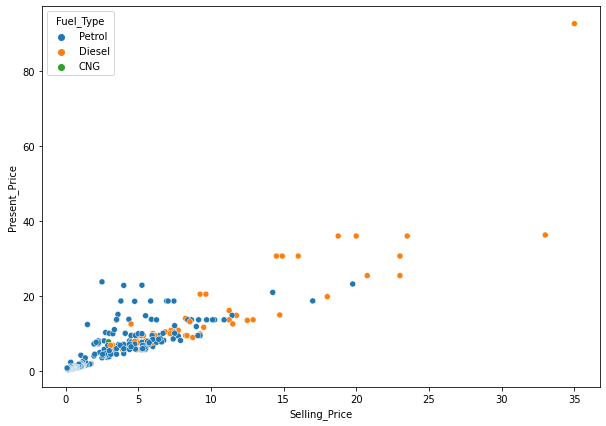

In [226]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=hdf, x="Selling_Price", y="Present_Price",hue="Fuel_Type")
plt.show()

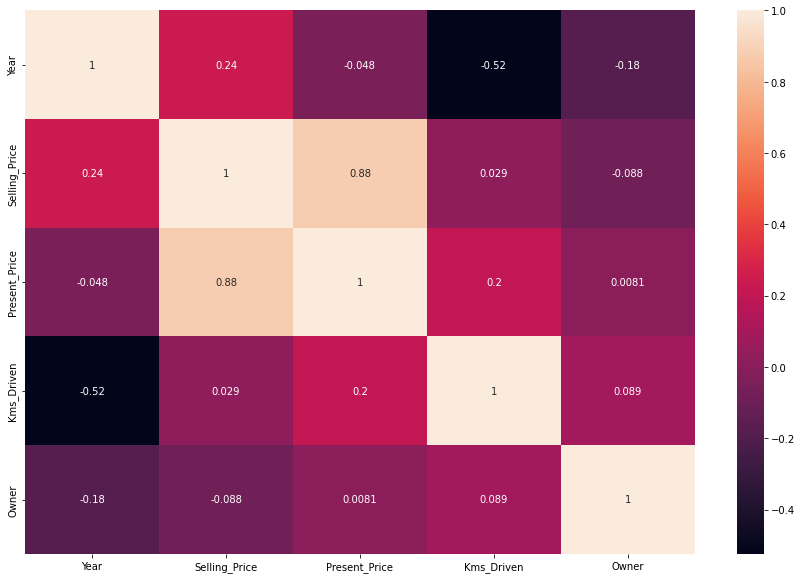

In [227]:
from pyspark.ml.feature import VectorAssembler    
from pyspark.ml.stat import Correlation
plt.figure(figsize=(15,10))
sns.heatmap(hdf.corr(), annot=True)
plt.show()

### Observation:

Selling_Price is highly correlated with Presnet_Price and is mildly influenced by Year of make as well.

We can see Present_Price is slightly related to Kms_Driven but is not influenced as much.

Kms_Driven and Year are inversely correlated, indicating that some listed cars are being driven since their make year.

In [228]:
hdff.stratify(['Transmission']).cols['Selling_Price'].mean()

Transmission
Automatic    9.420000
Manual       3.931992
Name: Selling_Price, dtype: float64

## Mean value for Manual Transmission cars is 3.9 lacs and it is 9.4 lacs for Automatic.

In [229]:
hdff.stratify(['Fuel_Type']).cols['Selling_Price'].mean()

Fuel_Type
CNG        3.100000
Diesel    10.278500
Petrol     3.264184
Name: Selling_Price, dtype: float64

## Mean value for fuel type  CNG cars is 3.1 lacs and for Diesel is 10 lacs and petrol is 3.2 lacs

In [230]:
df.show()

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         6.75|         8.12|     18796|   Petrol|     Dealer|      Manu

# Transforming Data using onehotencoder

In [231]:
df.columns


['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

In [232]:
final_df=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
final_df.show()

+----+-------------+-------------+----------+---------+-----------+------------+-----+
|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+----+-------------+-------------+----------+---------+-----------+------------+-----+
|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|2015|         6.75|         8.12|     18796|   Petrol|     Dealer|      Manual|    0|
|2015|          6.5|         8.61|     33429|   Diesel|     Dealer|      Manual|    0|
|2016|         8.75|         8.89|     2027

In [237]:
from pyspark.ml.feature import StringIndexer
Fueltype_indexer = StringIndexer(inputCol="Fuel_Type", outputCol="Fuel_Type_indexer")
#Fits a model to the input dataset with optional parameters.
df1 = Fueltype_indexer.fit(final_df).transform(final_df)
df1.show()

+----+-------------+-------------+----------+---------+-----------+------------+-----+-----------------+
|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|Fuel_Type_indexer|
+----+-------------+-------------+----------+---------+-----------+------------+-----+-----------------+
|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|              0.0|
|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|              1.0|
|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|              0.0|
|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|              0.0|
|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|              1.0|
|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|              1.0|
|2015|         6.75|         8.12|     18796|   Petrol|

In [239]:
from pyspark.ml.feature import StringIndexer
Seller_indexer = StringIndexer(inputCol="Seller_Type", outputCol="Seller_Type_indexer")
#Fits a model to the input dataset with optional parameters.
df2 = Seller_indexer.fit(df1).transform(df1)
df2.show()

+----+-------------+-------------+----------+---------+-----------+------------+-----+-----------------+-------------------+
|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|Fuel_Type_indexer|Seller_Type_indexer|
+----+-------------+-------------+----------+---------+-----------+------------+-----+-----------------+-------------------+
|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|              0.0|                0.0|
|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|              1.0|                0.0|
|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|              0.0|                0.0|
|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|              0.0|                0.0|
|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|              1.0|                0.0|


In [240]:
from pyspark.ml.feature import StringIndexer
transmission_indexer = StringIndexer(inputCol="Transmission", outputCol="transmission_indexer")
#Fits a model to the input dataset with optional parameters.
df3 = transmission_indexer.fit(df2).transform(df2)
df3.show()

+----+-------------+-------------+----------+---------+-----------+------------+-----+-----------------+-------------------+--------------------+
|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|Fuel_Type_indexer|Seller_Type_indexer|transmission_indexer|
+----+-------------+-------------+----------+---------+-----------+------------+-----+-----------------+-------------------+--------------------+
|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|              0.0|                0.0|                 0.0|
|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|              1.0|                0.0|                 0.0|
|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|              0.0|                0.0|                 0.0|
|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|              0.0|                0.0|

In [241]:
from pyspark.ml.feature import OneHotEncoder

In [246]:
onehotencoder = OneHotEncoder(inputCol="Fuel_Type_indexer", outputCol="Fueltype")
df4 = onehotencoder.fit(df3).transform(df3)


In [248]:
onehotencoder = OneHotEncoder(inputCol="transmission_indexer", outputCol="transmission")
df5 = onehotencoder.fit(df4).transform(df4)

In [250]:
onehotencoder = OneHotEncoder(inputCol="Seller_Type_indexer", outputCol="selletype")
df6 = onehotencoder.fit(df5).transform(df5)

In [252]:
df6.columns

['Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'transmission',
 'Owner',
 'Fuel_Type_indexer',
 'Seller_Type_indexer',
 'transmission_indexer',
 'Fueltype',
 'selletype']

# Feature Selection

In [255]:
data=df6[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fueltype', 'selletype', 'transmission', 'Owner']]

In [256]:
data.show()

+----+-------------+-------------+----------+-------------+-------------+-------------+-----+
|Year|Selling_Price|Present_Price|Kms_Driven|     Fueltype|    selletype| transmission|Owner|
+----+-------------+-------------+----------+-------------+-------------+-------------+-----+
|2014|         3.35|         5.59|     27000|(2,[0],[1.0])|(1,[0],[1.0])|(1,[0],[1.0])|    0|
|2013|         4.75|         9.54|     43000|(2,[1],[1.0])|(1,[0],[1.0])|(1,[0],[1.0])|    0|
|2017|         7.25|         9.85|      6900|(2,[0],[1.0])|(1,[0],[1.0])|(1,[0],[1.0])|    0|
|2011|         2.85|         4.15|      5200|(2,[0],[1.0])|(1,[0],[1.0])|(1,[0],[1.0])|    0|
|2014|          4.6|         6.87|     42450|(2,[1],[1.0])|(1,[0],[1.0])|(1,[0],[1.0])|    0|
|2018|         9.25|         9.83|      2071|(2,[1],[1.0])|(1,[0],[1.0])|(1,[0],[1.0])|    0|
|2015|         6.75|         8.12|     18796|(2,[0],[1.0])|(1,[0],[1.0])|(1,[0],[1.0])|    0|
|2015|          6.5|         8.61|     33429|(2,[1],[1.0])|(

In [268]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols = ["Year","Present_Price","Kms_Driven","Fueltype","transmission","selletype","Owner"],
                           outputCol = "Input Attributes")

In [269]:
from pyspark.ml.regression import RandomForestRegressor
regressor = RandomForestRegressor(featuresCol = 'Input Attributes', labelCol = "Selling_Price")

In [270]:
from pyspark.ml import Pipeline
pipeline  = Pipeline(stages = [assembler,regressor])

In [271]:
from pyspark.ml.tuning import ParamGridBuilder
paramGrid = ParamGridBuilder().addGrid(regressor.numTrees,[100,500]) .build()

In [272]:
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
crossval = CrossValidator(estimator = pipeline,
                         estimatorParamMaps = paramGrid,
                         evaluator = RegressionEvaluator(labelCol = "Selling_Price"),
                         numFolds = 3)

In [273]:
train_data , test_data = data.randomSplit([0.8,0.2], seed = 123)

In [274]:
cvModel = crossval.fit(train_data)
cvModel

CrossValidatorModel_340105aa8cc3

In [275]:
bestModel = cvModel.bestModel
print(bestModel.stages)

[VectorAssembler_29e13052012e, RandomForestRegressionModel: uid=RandomForestRegressor_e88dc5f9ea7a, numTrees=500, numFeatures=8]


In [283]:
pred = cvModel.transform(test_data)
pred.show(10)

+----+-------------+-------------+----------+-------------+-------------+-------------+-----+--------------------+------------------+
|Year|Selling_Price|Present_Price|Kms_Driven|     Fueltype|    selletype| transmission|Owner|    Input Attributes|        prediction|
+----+-------------+-------------+----------+-------------+-------------+-------------+-----+--------------------+------------------+
|2004|          1.5|        12.35|    135154|(2,[0],[1.0])|(1,[0],[1.0])|    (1,[],[])|    0|[2004.0,12.35,135...| 4.590662033933393|
|2005|         3.51|         13.7|     75000|(2,[0],[1.0])|(1,[0],[1.0])|(1,[0],[1.0])|    0|[2005.0,13.7,7500...|4.7398942567942735|
|2007|          0.2|         0.75|     49000|(2,[0],[1.0])|    (1,[],[])|(1,[0],[1.0])|    1|[2007.0,0.75,4900...|0.3729526963895476|
|2008|         0.17|         0.52|    500000|(2,[0],[1.0])|    (1,[],[])|    (1,[],[])|    0|(8,[0,1,2,3],[200...|0.5709209191492451|
|2008|         1.95|         7.15|     58000|(2,[0],[1.0])|(1,

In [286]:
pred.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Selling_Price: double (nullable = true)
 |-- Present_Price: double (nullable = true)
 |-- Kms_Driven: integer (nullable = true)
 |-- Fueltype: vector (nullable = true)
 |-- selletype: vector (nullable = true)
 |-- transmission: vector (nullable = true)
 |-- Owner: integer (nullable = true)
 |-- Input Attributes: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [280]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol = 'Selling_Price')
rmse = eval.evaluate(pred, {eval.metricName:'rmse'})
mae = eval.evaluate(pred, {eval.metricName:"mae"})
r2 =eval.evaluate(pred,{eval.metricName:'r2'})

In [281]:
print("RMSE: %.3f" %rmse)
print("MAE: %.3f" %mae)
print("R2: %.3f" %r2)

RMSE: 3.075
MAE: 1.180
R2: 0.711
